In [3]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract

import re
import string

In [4]:
img_cv = cv2.imread('./allinvoices_img_2/077.jpg')

In [5]:
cv2.namedWindow("Invoice", cv2.WINDOW_NORMAL)
imS = cv2.resize(img_cv, (4132, 5848))
cv2.imshow('Invoice', imS)

cv2.waitKey(0)
cv2.destroyAllWindows()

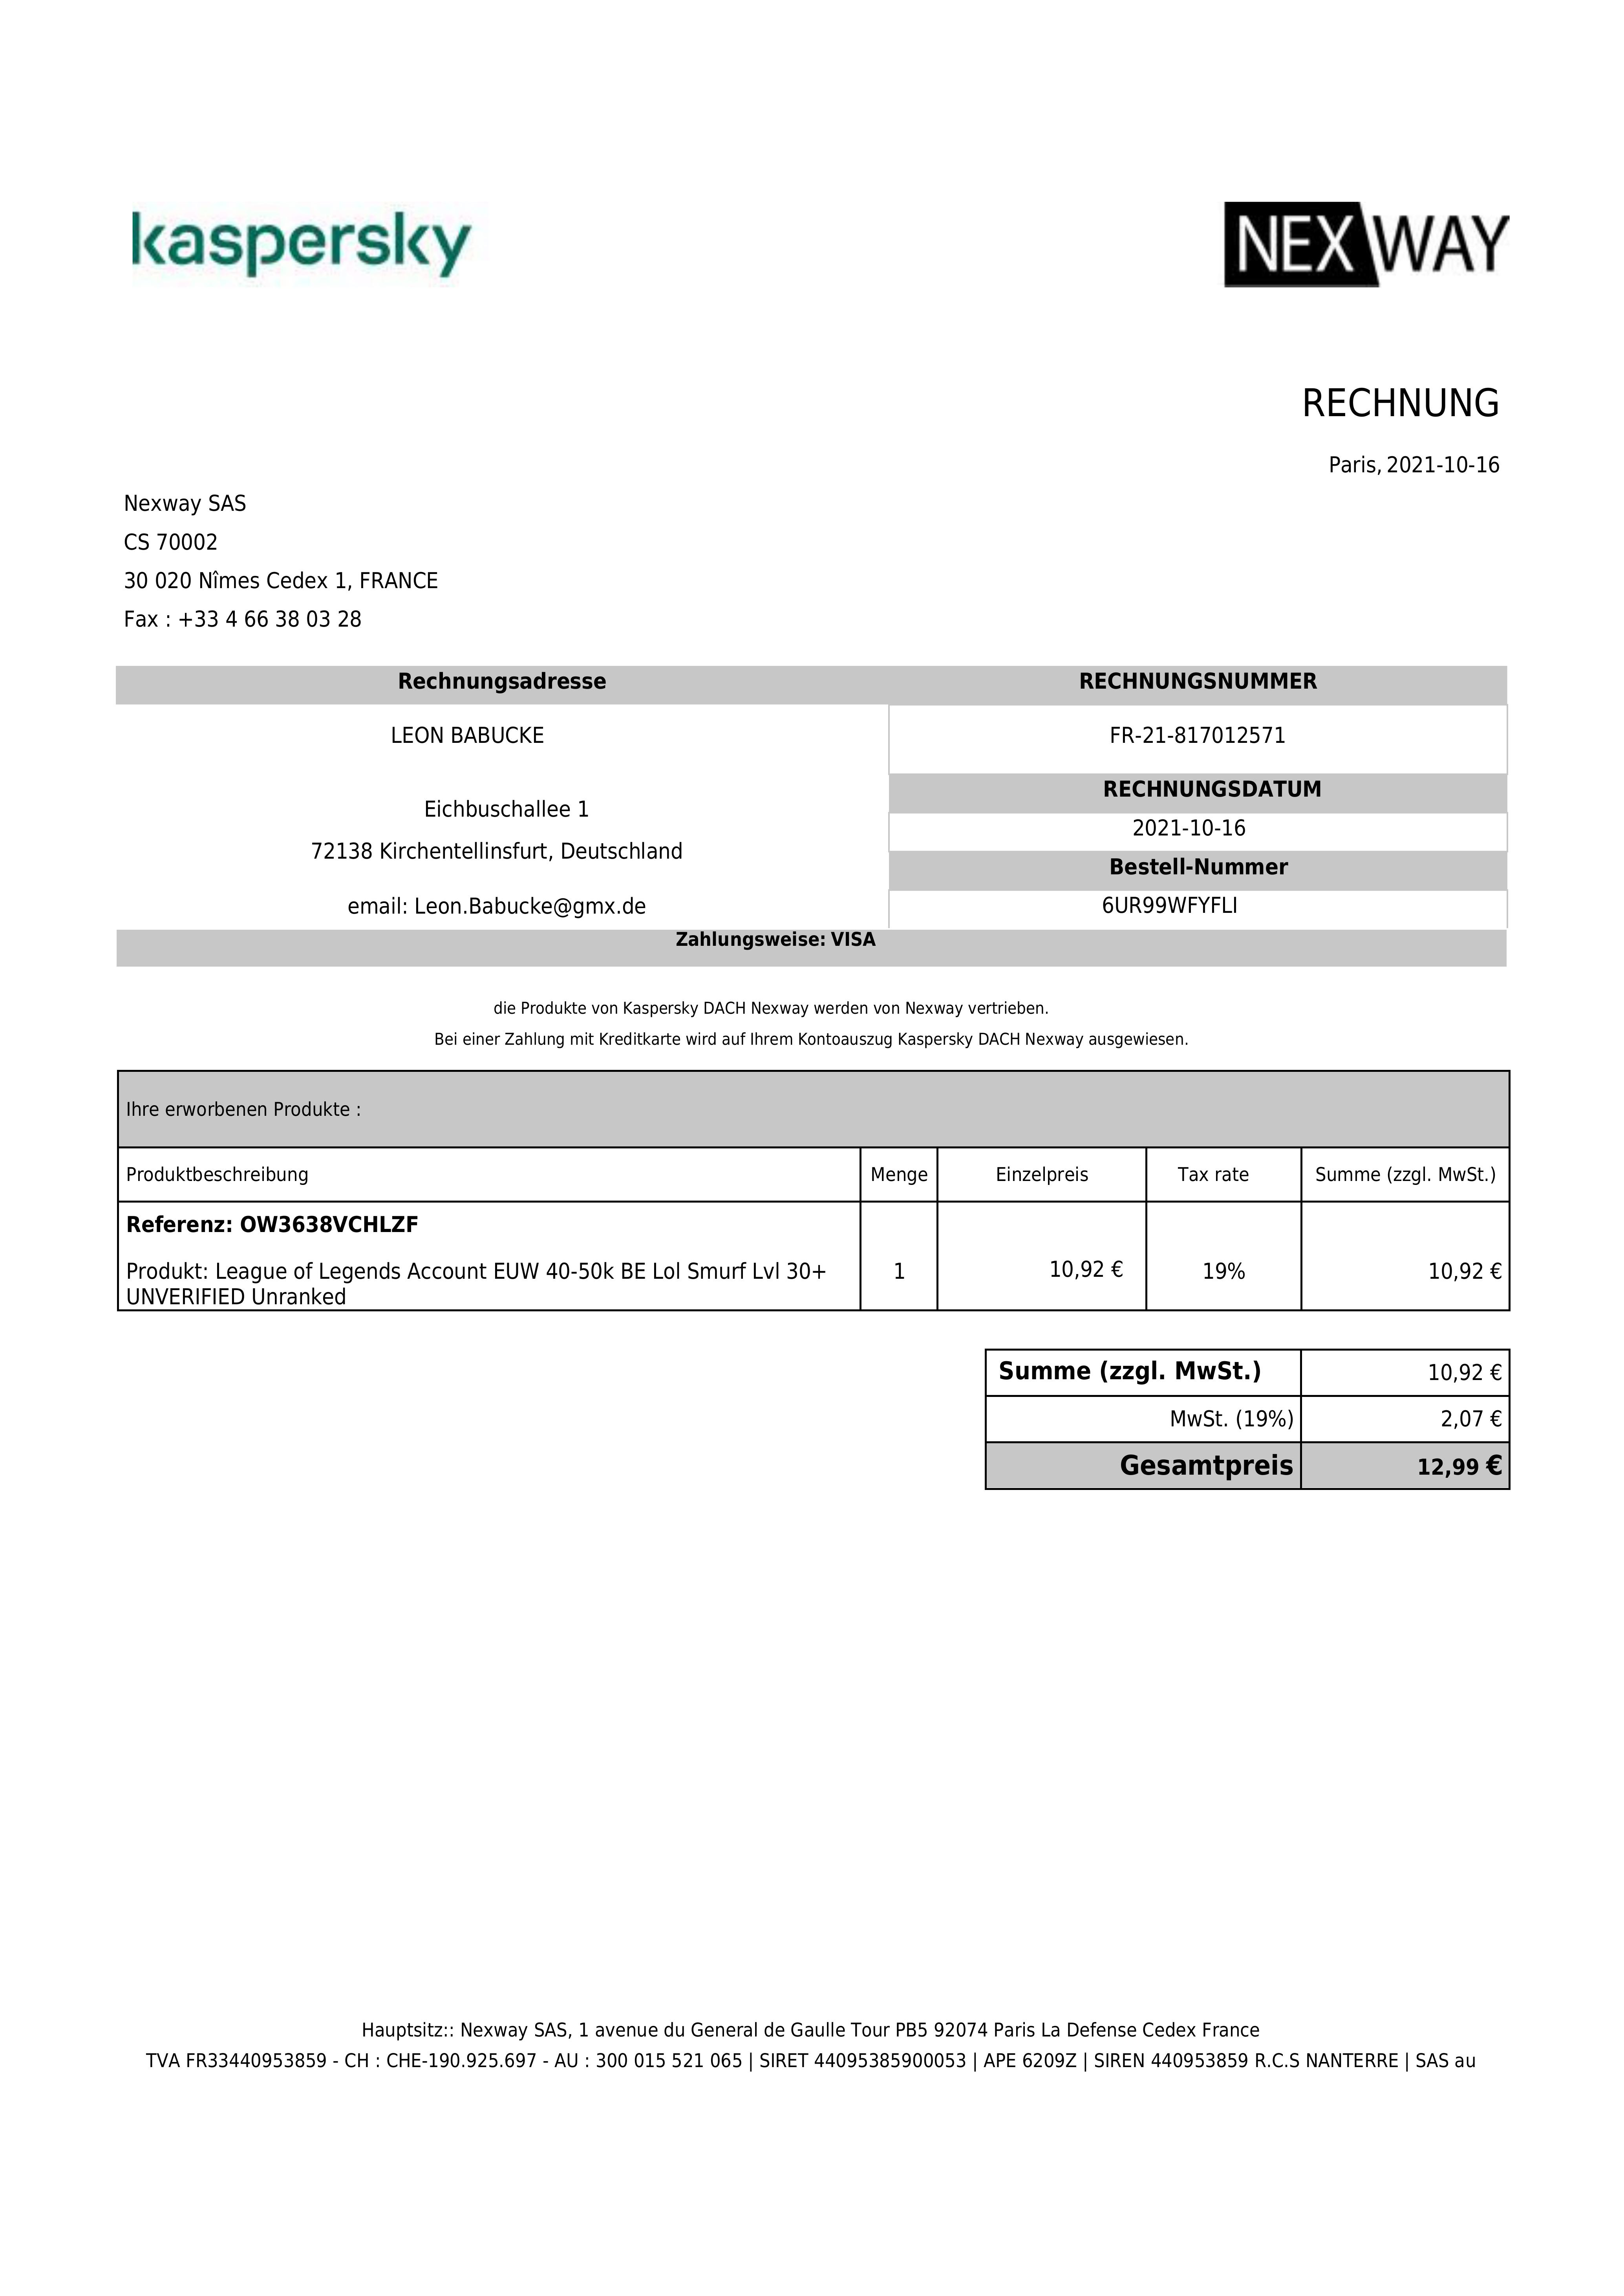

In [6]:
img_pl = PIL.Image.open('./allinvoices_img_2/077.jpg')
img_pl

In [5]:
text_cv = pytesseract.image_to_string(img_cv, lang='deu')
# text_cv

In [8]:
# print(text_cv)

In [7]:
text_pl = pytesseract.image_to_string(img_pl, lang='deu')
# print(text_pl)

In [7]:
data = pytesseract.image_to_data(img_cv, lang='deu')

In [8]:
# print(data)
#data.split('\n')
dataList = list(map(lambda x: x.split('\t'), data.split('\n')))
df = pd.DataFrame(dataList[1:], columns=dataList[0])

In [11]:
# df
# df.loc[:50]
# df.loc[51:99]
df.loc[100:149]
# df.loc[150:199]
# df.loc[200:249]
# df.loc[250:299]
# df.loc[299:]
# df.head(60)
#dataList

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
100,5,1,8,1,1,2,422,2805,256,38,96.545280,erworbenen
101,5,1,8,1,1,3,700,2805,190,38,93.021790,Produkte
102,5,1,8,1,1,4,911,2817,5,25,91.993385,:
103,2,1,9,0,0,0,325,3096,3499,227,-1,
104,3,1,9,1,0,0,325,3096,3499,227,-1,
105,4,1,9,1,1,0,326,3096,737,43,-1,
106,5,1,9,1,1,1,326,3096,263,43,91.562241,Referenz:
107,5,1,9,1,1,2,613,3097,450,42,91.562241,OW3638VCHLZF
108,4,1,9,1,2,0,326,3211,3498,58,-1,
109,5,1,9,1,2,1,326,3215,200,43,96.522415,Produkt:


In [12]:
#df.info()

In [13]:
df.dropna(inplace=True)
# df.info()

In [14]:
col_int = ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf']
df[col_int] = df[col_int].astype(float).astype(int)
# df['conf'] = df['conf'].astype(int)

In [15]:
# df['level'] = df['level'].astype(int)
# df['page_num'] = df['page_num'].astype(int)
# df['block_num'] = df['block_num'].astype(int)
# df['par_num'] = df['par_num'].astype(int)
# df['line_num'] = df['line_num'].astype(int)
# df['word_num'] = df['word_num'].astype(int)
# df['left'] = df['left'].astype(int)
# df['top'] = df['top'].astype(int)
# df['width'] = df['width'].astype(int)
# df['height'] = df['height'].astype(int)
# print(type(df['conf']))
# for x in df['conf']:
#     int(x)
    
# df['conf'] = [int(x) for x in df['conf']]
# df['conf'] = df['conf'].astype(int)

In [16]:
df.dtypes

level         int32
page_num      int32
block_num     int32
par_num       int32
line_num      int32
word_num      int32
left          int32
top           int32
width         int32
height        int32
conf          int32
text         object
dtype: object

In [17]:
image = img_cv.copy()
level = 'line'
for l,x,y,w,h,c,txt in df[['level', 'left', 'top','width', 'height', 'conf', 'text']].values:
    #print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
        else:
            continue
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            continue
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        else:
            continue
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),1)
        else:
            continue
    

cv2.namedWindow("Invoice", cv2.WINDOW_NORMAL)
imS = cv2.resize(image, (4136, 5848))
cv2.imshow('Invoice', imS)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
whitespace = string.whitespace
punctuation = string.punctuation

In [33]:
whitespace

' \t\n\r\x0b\x0c'

In [35]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'